In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
from datetime import date
import yfinance as yfin
yfin.pdr_override()
from sklearn.preprocessing import MinMaxScaler


In [28]:
for_date = int(str(date.today())[:4])-10
start = str(for_date)+str(date.today())[4:]
end = str(date.today())

df = pdr.get_data_yahoo('AAPL', start, end)

df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,19.779285,19.821428,19.343929,19.608213,16.862822,560518000
2013-01-03,19.567142,19.631071,19.321428,19.360714,16.649979,352965200
2013-01-04,19.177500,19.236786,18.779642,18.821428,16.186197,594333600
2013-01-07,18.642857,18.903570,18.400000,18.710714,16.090988,484156400
2013-01-08,18.900356,18.996071,18.616072,18.761070,16.134287,458707200


In [29]:
df = df.reset_index()
df = df.drop(["Date"], axis=1)

df.head()

,Open,High,Low,Close,Adj Close,Volume
0,19.779285,19.821428,19.343929,19.608213,16.862822,560518000
1,19.567142,19.631071,19.321428,19.360714,16.649979,352965200
2,19.177500,19.236786,18.779642,18.821428,16.186197,594333600
3,18.642857,18.903570,18.400000,18.710714,16.090988,484156400
4,18.900356,18.996071,18.616072,18.761070,16.134287,458707200


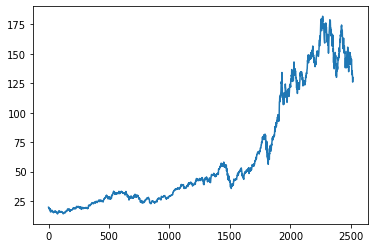

In [30]:
plt.plot(df.Close)

In [31]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2513    150.515600
2514    150.157800
2515    149.764699
2516    149.412100
2517    149.062199
Name: Close, Length: 2518, dtype: float64

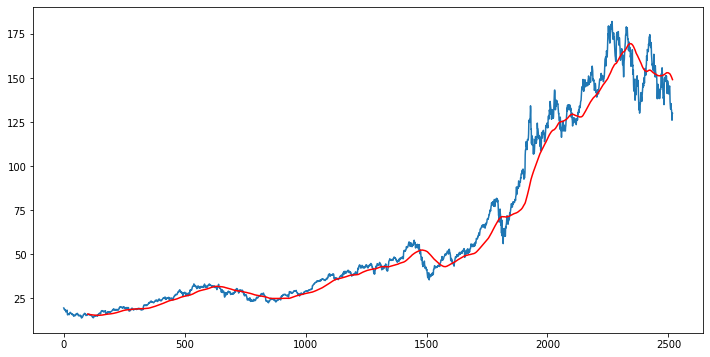

In [32]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100 , 'r')

In [33]:
ma200 = df.Close.rolling(200).mean()
ma200

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2513    152.1331
2514    152.0096
2515    151.8867
2516    151.7593
2517    151.6110
Name: Close, Length: 2518, dtype: float64

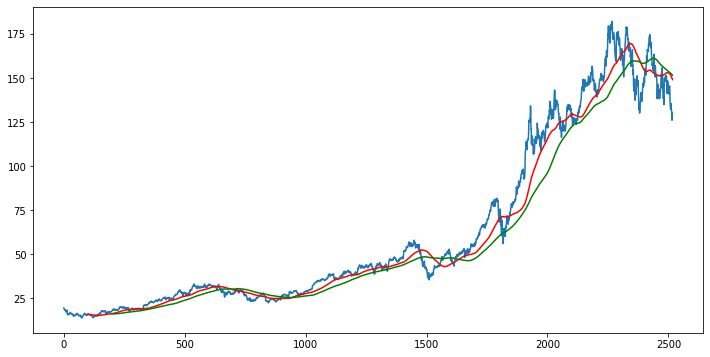

In [34]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100 , 'r')
plt.plot(ma200 , 'g')

In [35]:
train = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
test = pd.DataFrame(df['Close'][int(len(df)*0.70):])

In [37]:
train.shape,test.shape

((1762, 1), (756, 1))

In [39]:
scaler = MinMaxScaler(feature_range=(0,1))

In [41]:
train_arr = scaler.fit_transform(train)
train_arr


array([[0.09519404],
       [0.09103193],
       [0.08196297],
       ...,
       [0.98381398],
       [0.99104513],
       [1.        ]])

In [42]:
x_train, y_train = [] , []

In [43]:
for i in range(100, train_arr.shape[0]):
    x_train.append(train_arr[i-100:i])
    y_train.append(train_arr[i,0])

In [44]:
x_train , y_train = np.array(x_train), np.array(y_train)

In [45]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [46]:
model = Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape= (x_train.shape[1],1)))
model.add(Dropout(0.1))

model.add(LSTM(units=60,activation='relu',return_sequences=True,input_shape= (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=80,activation='relu',return_sequences=True,input_shape= (x_train.shape[1],1)))
model.add(Dropout(0.3))

model.add(LSTM(units=100,activation='relu',return_sequences=True,input_shape= (x_train.shape[1],1)))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units= 1))

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 100, 100)          7

In [48]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
52/52 [==============================] - 26s 383ms/step - loss: 0.0437
Epoch 2/50
52/52 [==============================] - 19s 369ms/step - loss: 0.0073
Epoch 3/50
52/52 [==============================] - 17s 321ms/step - loss: 0.0066
Epoch 4/50
52/52 [==============================] - 16s 300ms/step - loss: 0.0052
Epoch 5/50
52/52 [==============================] - 15s 296ms/step - loss: 0.0063
Epoch 6/50
52/52 [==============================] - 15s 293ms/step - loss: 0.0049
Epoch 7/50
52/52 [==============================] - 15s 290ms/step - loss: 0.0047
Epoch 8/50
52/52 [==============================] - 18s 341ms/step - loss: 0.0047
Epoch 9/50
52/52 [==============================] - 17s 326ms/step - loss: 0.0048
Epoch 10/50
52/52 [==============================] - 17s 321ms/step - loss: 0.0041
Epoch 11/50
52/52 [==============================] - 16s 313ms/step - loss: 0.0041
Epoch 12/50
52/52 [==============================] - 16s 313ms/step - loss: 0.0037
Epoch 13/50
5

In [49]:
model.save('stock_trend_predictor.h5')

In [50]:
past_100 = train.tail(100)
final_test= past_100.append(test,ignore_index=True)

In [51]:
final_test_arr = scaler.fit_transform(final_test)

In [53]:
x_test , y_test = [],[]
for i in range(100,final_test_arr.shape[0]):
    x_test.append(final_test_arr[i-100:i])
    y_test.append(final_test_arr[i,0])

In [54]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [55]:
y_pred = model.predict(x_test)

24/24 [==============================] - 3s 110ms/step


In [56]:
scaler.scale_

array([0.00758208])

In [57]:
scale_factor = 1/0.00758208
y_pred = y_pred*scale_factor
y_test = y_test*scale_factor


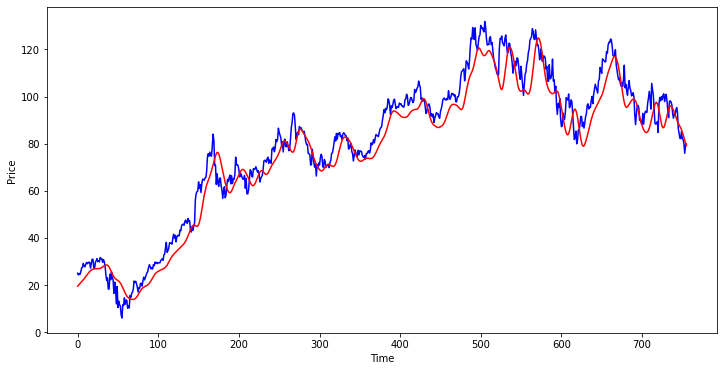

In [58]:
plt.figure(figsize=(12,6))
plt.plot(y_test , 'b', label = 'Original Values')
plt.plot(y_pred , 'r', label = 'Predicted Values')
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()